In [1]:
import numpy
import cv2
from corpus_unpdf.images.contours import get_pos_title_end, get_pos_title_start, get_pos_footnote_start
from pathlib import Path
from corpus_unpdf import get_img

In [2]:
PAGE_NUM = 0
PDF = Path().cwd() / "data" / "data2.pdf"

Executing <Task pending name='Task-3' coro=<Kernel.dispatch_queue() running at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py:512> wait_for=<Future pending cb=[Task.task_wakeup()] created at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/queues.py:248> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/ioloop.py:687] created at /Users/mv/.pyenv/versions/3.11.1/lib/python3.11/asyncio/tasks.py:670> took 0.160 seconds


In [3]:
im = get_img(PDF, pagenum=PAGE_NUM)
opencvImage = cv2.cvtColor(numpy.array(im), cv2.COLOR_RGB2BGR)
base_image = opencvImage.copy()
im_h, im_w, im_d = opencvImage.shape
footnote_top = get_pos_footnote_start(opencvImage) 
page1_header_top = get_pos_title_start(opencvImage)
page1_start = get_pos_title_end(opencvImage) 

print(f"{page1_header_top=}, {page1_start}, {footnote_top=}")

page1_header_top=0.26205128205128203, 0.5628205128205128, footnote_top=0.8271794871794872


In [4]:
import pdfplumber
pdf = pdfplumber.open(PDF)
page = pdf.pages[0]


Executing <Task pending name='Task-3' coro=<Kernel.dispatch_queue() running at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py:512> wait_for=<Future pending cb=[Task.task_wakeup()] created at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/queues.py:248> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/ioloop.py:687] created at /Users/mv/.pyenv/versions/3.11.1/lib/python3.11/asyncio/tasks.py:670> took 1.080 seconds


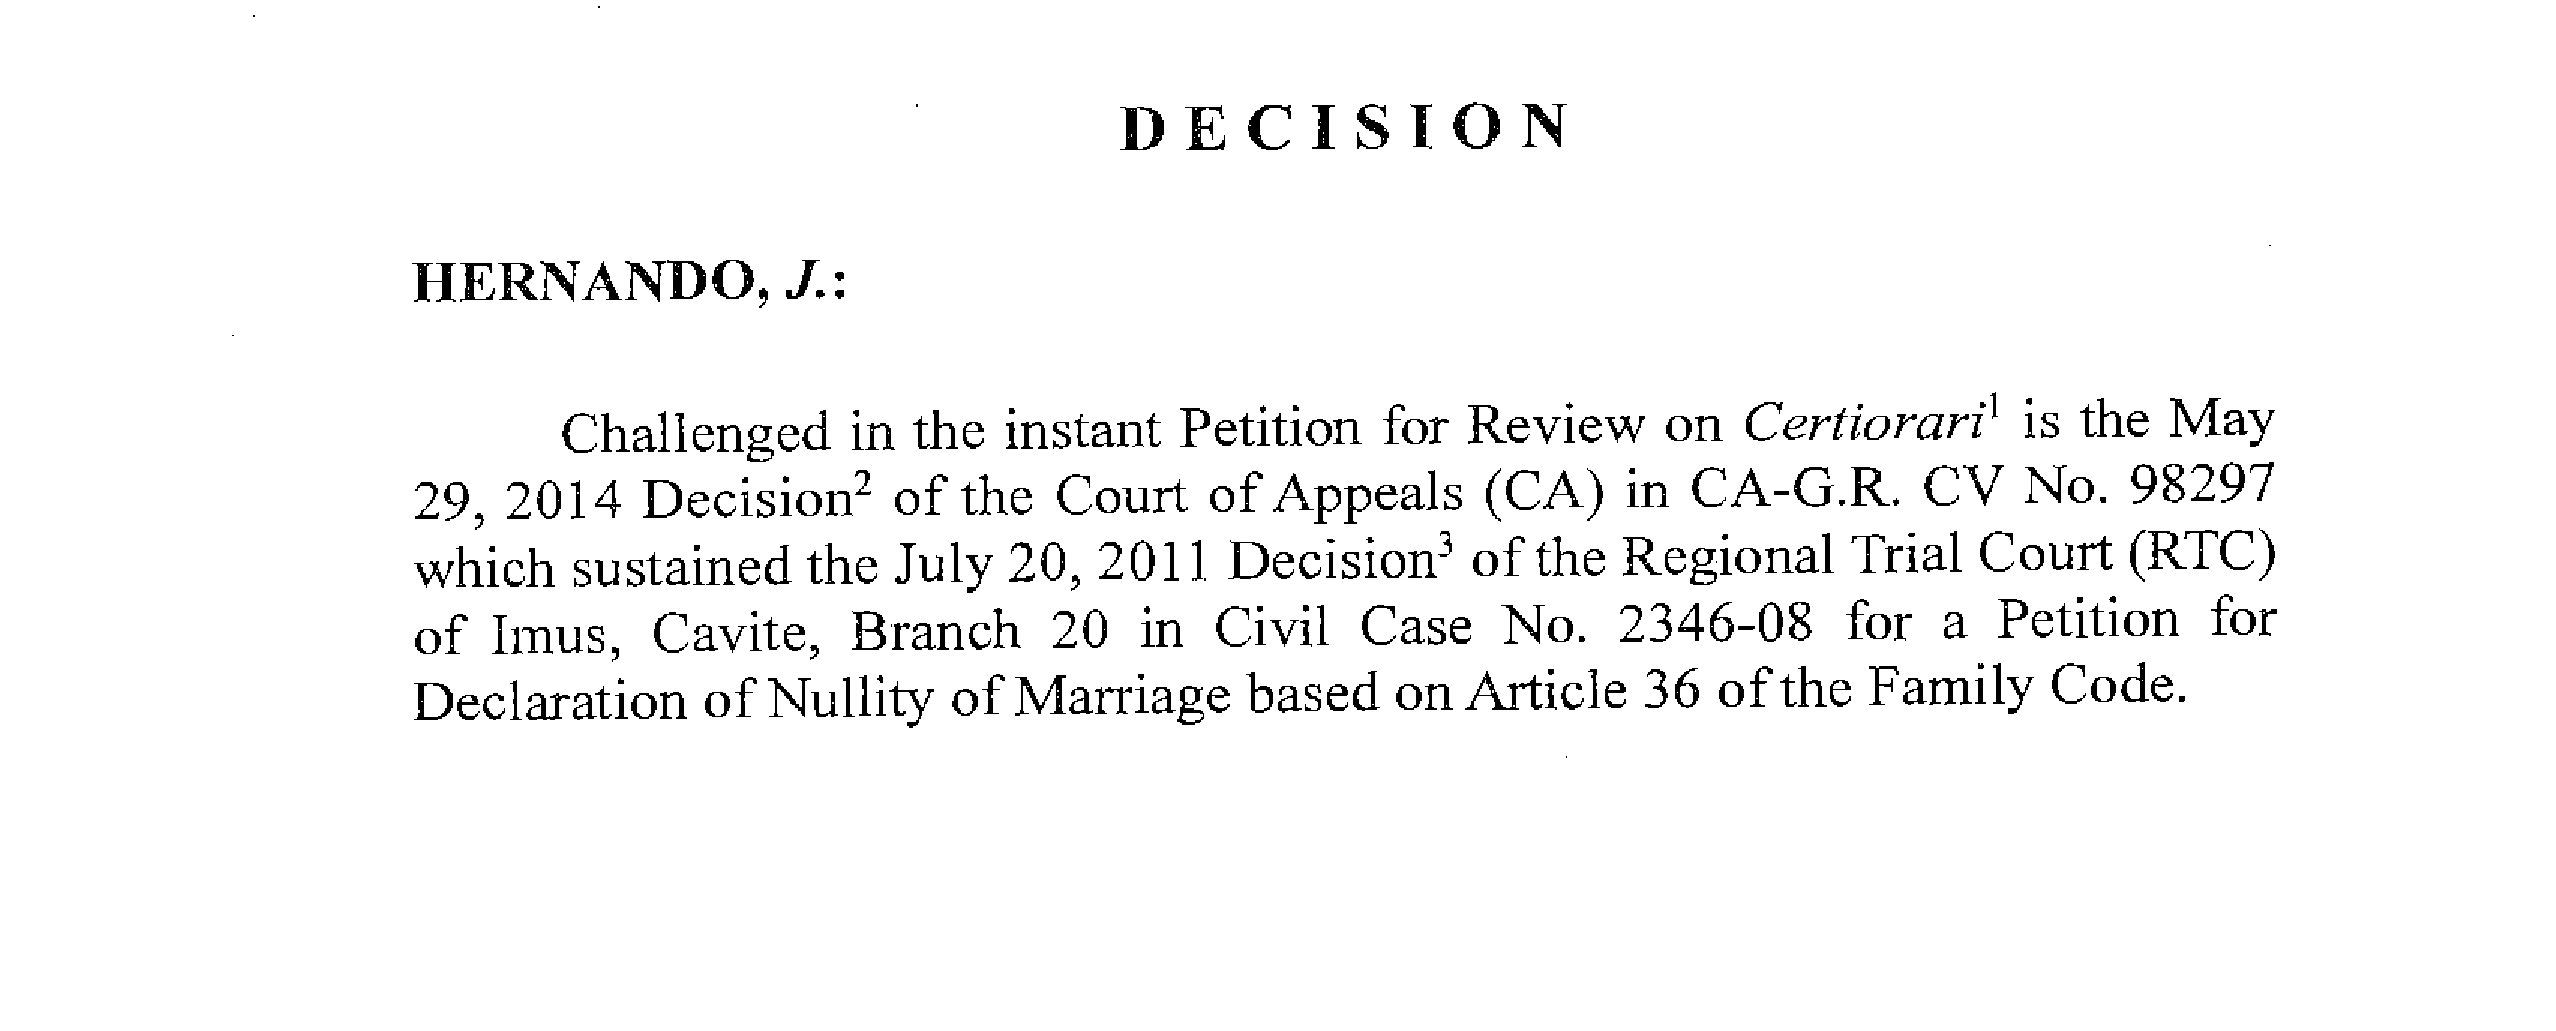

Executing <Task pending name='Task-3' coro=<Kernel.dispatch_queue() running at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py:512> wait_for=<Future pending cb=[Task.task_wakeup()] created at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/queues.py:248> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/ioloop.py:687] created at /Users/mv/.pyenv/versions/3.11.1/lib/python3.11/asyncio/tasks.py:670> took 0.960 seconds


In [9]:
page.crop(
  bbox=(PAGE_NUM, page.height * page1_start, page.width, page.height * footnote_top),
  relative=False,
  strict=True,
).to_image(resolution=300)

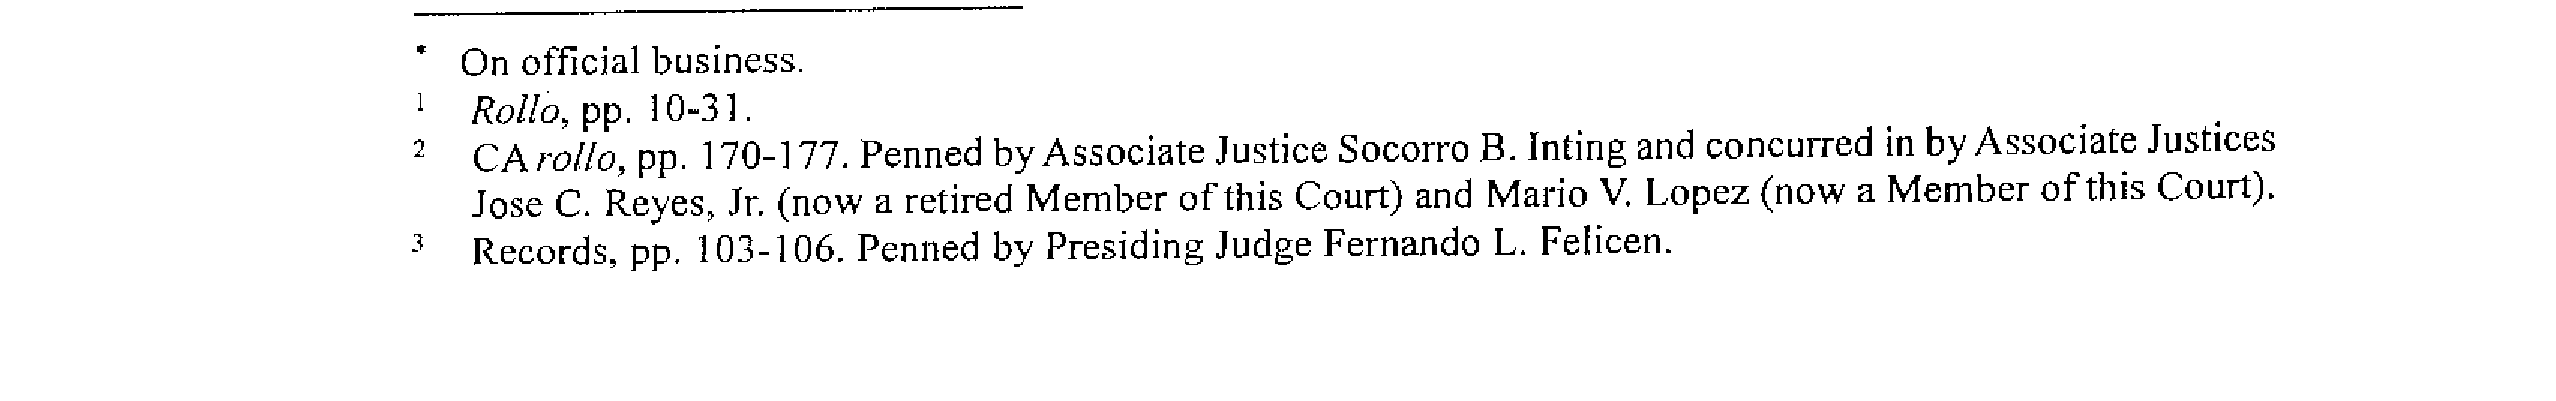

Executing <Task pending name='Task-3' coro=<Kernel.dispatch_queue() running at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py:512> wait_for=<Future pending cb=[Task.task_wakeup()] created at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/queues.py:248> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/mv/Code/corpus-unpdf/.venv/lib/python3.11/site-packages/tornado/ioloop.py:687] created at /Users/mv/.pyenv/versions/3.11.1/lib/python3.11/asyncio/tasks.py:670> took 0.859 seconds


In [10]:
page.crop(
  bbox=(PAGE_NUM, page.height * footnote_top, page.width, page.height * 0.93),
  relative=False,
  strict=True,
).to_image(resolution=300)